# Analyzing gene_expression(Cancer) data and creating a model that will predict based on the value of 'Gene One' and 'Gene Two' that if the Cancer is present or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('white')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

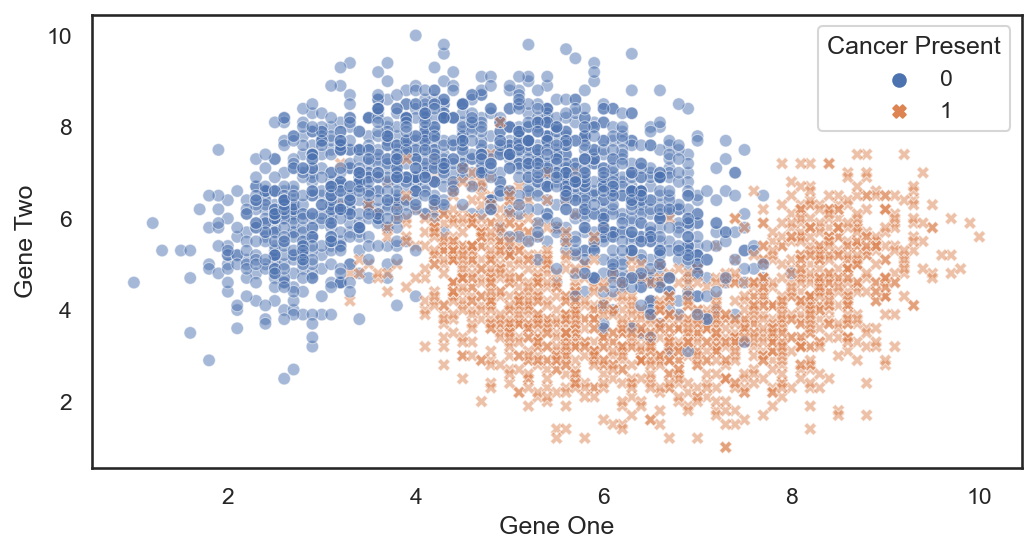

In [5]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5, style='Cancer Present')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [7]:
len(df)

3000

In [8]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [9]:
df['Cancer Present'].iplot(kind='hist')

In [10]:
df['Cancer Present'].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:>

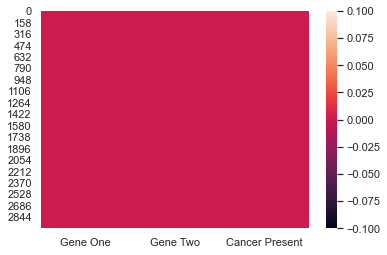

In [11]:
sns.heatmap(df.isnull())

In [12]:
fig = px.box(df, x='Gene One', color='Cancer Present')
fig.show()

In [13]:
fig = px.box(df, x='Gene Two', color='Cancer Present')
fig.show()

In [14]:
df.corr()['Cancer Present'][:-1].sort_values().iplot(kind='bar')

<AxesSubplot:>

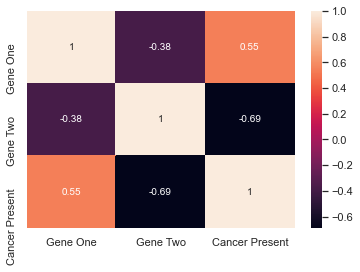

In [15]:
sns.heatmap(df.corr(),annot=True)

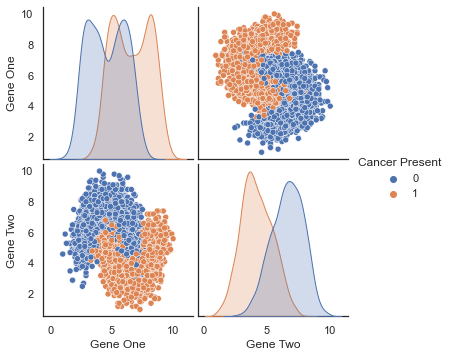

In [16]:
sns.pairplot(data=df, hue='Cancer Present')

In [17]:
X = df[['Gene One','Gene Two']]

In [18]:
y = df['Cancer Present']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train =  scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

## Elbow Method For K value

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

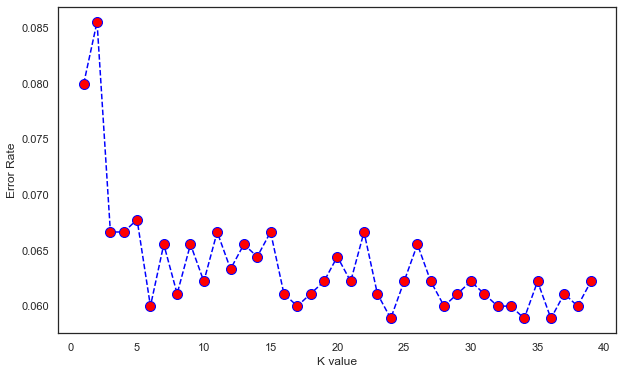

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls="dashed",marker='o',markerfacecolor='red'
        ,markersize=10)
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [28]:
fig = px.scatter(x=range(1,40),y=error_rate,height=500, labels={"x": "K Value",  "y": "Error Rate"}).update_traces(mode='lines+markers')
fig.show()

## GridSearchCV for value of K

In [29]:
KNN = KNeighborsClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
#help(KNeighborsClassifier)

In [32]:
n_neighbors = range(1, 41, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = {'n_neighbors':n_neighbors, 'weights':weights, 'metric':metric}

In [33]:
grid_model = GridSearchCV(KNN,param_grid,cv=10,verbose=1,scoring='accuracy')

In [34]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 41, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [35]:
grid_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 39, 'weights': 'uniform'}

In [36]:
grid_model.best_score_

0.9333333333333333

In [37]:
grid_model.predict_proba(X_test)

array([[0.58974359, 0.41025641],
       [0.        , 1.        ],
       [0.94871795, 0.05128205],
       ...,
       [0.25641026, 0.74358974],
       [0.97435897, 0.02564103],
       [0.        , 1.        ]])

In [38]:
grid_pred = grid_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

In [40]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [41]:
print(confusion_matrix(y_test,grid_pred))

[[391  32]
 [ 24 453]]


In [42]:
print(accuracy_score(y_test,grid_pred)*100)

93.77777777777779


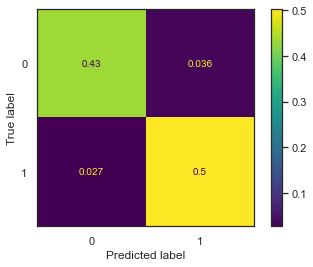

In [43]:
plot_confusion_matrix(grid_model,X_test,y_test,normalize='all')

In [44]:
new_patient = [[3.8,6.4]]

In [45]:
grid_model.predict(new_patient)

array([0], dtype=int64)

In [46]:
grid_model.predict_proba(new_patient)

array([[0.76923077, 0.23076923]])

In [47]:
new_patient1 = [[4.8,4.4]]

In [48]:
grid_model.predict(new_patient1)

array([1], dtype=int64)

In [49]:
grid_model.predict_proba(new_patient1)

array([[0.1025641, 0.8974359]])

In [50]:
new_patient2 = [[5.8,4.0]]
grid_model.predict(new_patient2)


array([1], dtype=int64)

In [51]:
grid_model.predict_proba(new_patient2)

array([[0., 1.]])